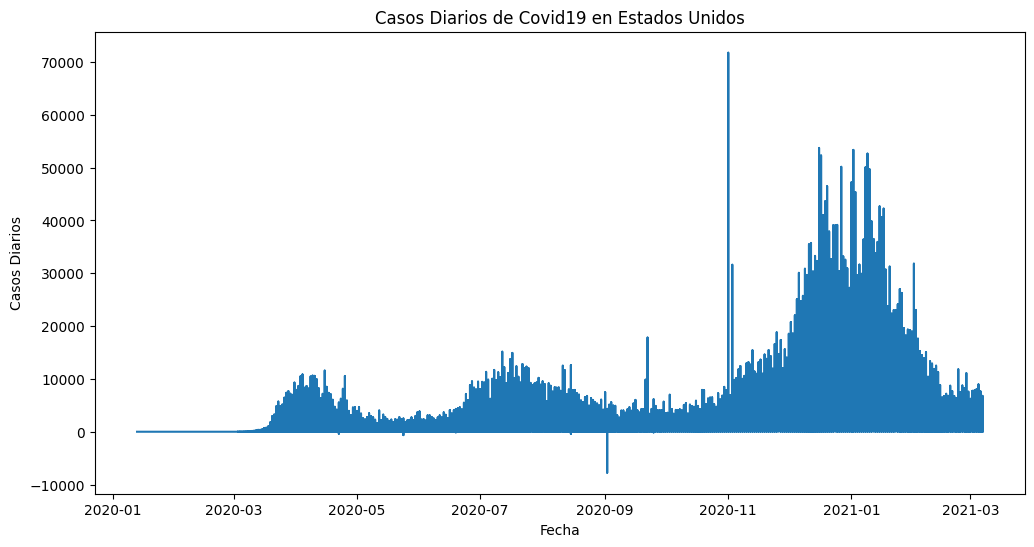

Estadísticas descriptivas de casos diarios:
count    20780.000000
mean      1383.849519
std       3023.558742
min      -7757.000000
25%         65.000000
50%        435.000000
75%       1335.250000
max      71734.000000
Name: positiveIncrease, dtype: float64


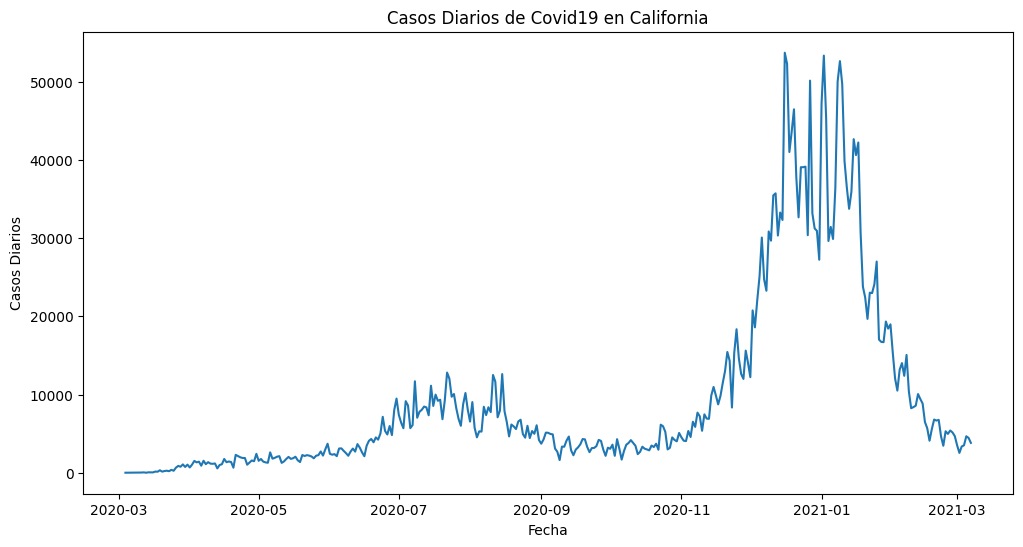

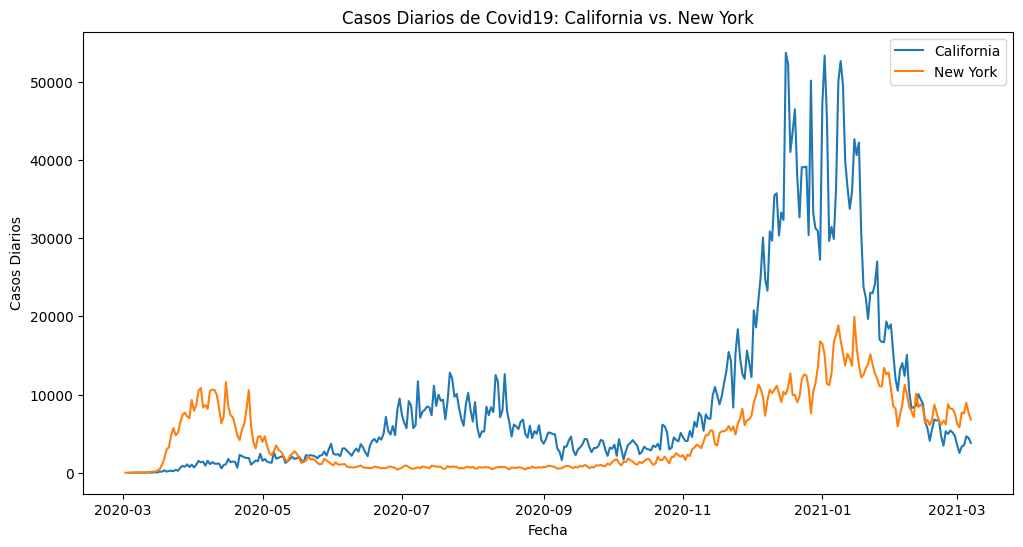

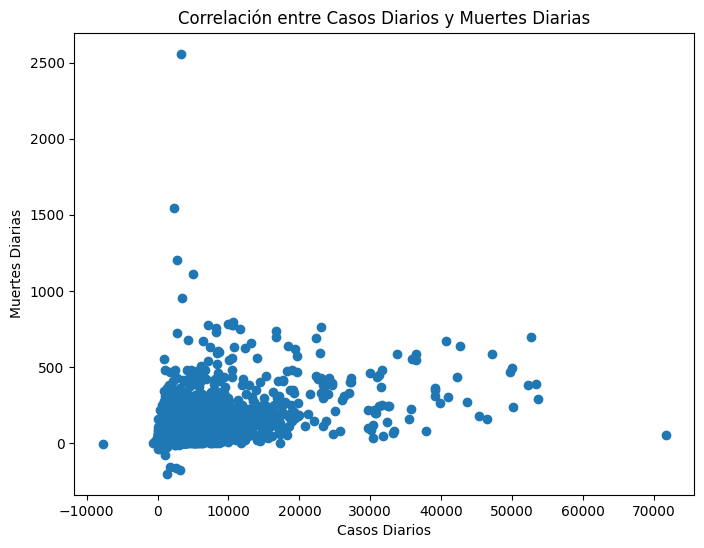

Conclusiones:


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los datos de Covid19 desde la API
def get_covid_data():
    url = "https://api.covidtracking.com/v1/states/daily.json"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error al obtener los datos. Código de estado:", response.status_code)
        return None

# Convertir datos en un DataFrame
data = get_covid_data()
df = pd.DataFrame(data)

# Asegúrate de tener la columna 'date' como tipo datetime con el formato adecuado
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Visualización con Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['positiveIncrease'])
plt.xlabel('Fecha')
plt.ylabel('Casos Diarios')
plt.title('Casos Diarios de Covid19 en Estados Unidos')
plt.show()

# Análisis y conclusiones
# Calcular estadísticas descriptivas básicas
print("Estadísticas descriptivas de casos diarios:")
print(df['positiveIncrease'].describe())

# Visualización de tendencias por estado (ejemplo: California)
state_data = df[df['state'] == 'CA']
plt.figure(figsize=(12, 6))
plt.plot(state_data['date'], state_data['positiveIncrease'])
plt.xlabel('Fecha')
plt.ylabel('Casos Diarios')
plt.title('Casos Diarios de Covid19 en California')
plt.show()

# Comparación entre estados (ejemplo: California vs. New York)
ny_data = df[df['state'] == 'NY']
plt.figure(figsize=(12, 6))
plt.plot(state_data['date'], state_data['positiveIncrease'], label='California')
plt.plot(ny_data['date'], ny_data['positiveIncrease'], label='New York')
plt.xlabel('Fecha')
plt.ylabel('Casos Diarios')
plt.legend()
plt.title('Casos Diarios de Covid19: California vs. New York')
plt.show()

# Análisis de factores de impacto (ejemplo: correlación entre casos y muertes)
plt.figure(figsize=(8, 6))
plt.scatter(df['positiveIncrease'], df['deathIncrease'])
plt.xlabel('Casos Diarios')
plt.ylabel('Muertes Diarias')
plt.title('Correlación entre Casos Diarios y Muertes Diarias')
plt.show()

# Conclusiones
print("Conclusiones:")
# Aquí puedes agregar tus conclusiones y descubrimientos basados en el análisis realizado.
